In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd
import tex

In [2]:
#Umrechnung vom Maß [cm] zu Winkel
r=250.25
dr=.25
skala = lambda x: x/r*180/np.pi /2
dskala= lambda x,dx=.5: np.sqrt( (dx/r)**2 + (x/r**2 * dr)**2 ) *180/np.pi /2

def calcC(n, delta,lambd=589e-9):
    return n*lambd/np.sin(delta*np.pi/180.0)
def calcdC(n,delta, ddelta,lambd=589e-9):
    return n*lambd/np.sin(delta*np.pi/180)**2 * np.cos(delta*np.pi/180) *ddelta*np.pi/180
    
def getColor(c,ordnung,color):
    number=[]
    for i in range(len(c)):
        if c[i] == color:
            number.append(i)
    return number[ordnung]

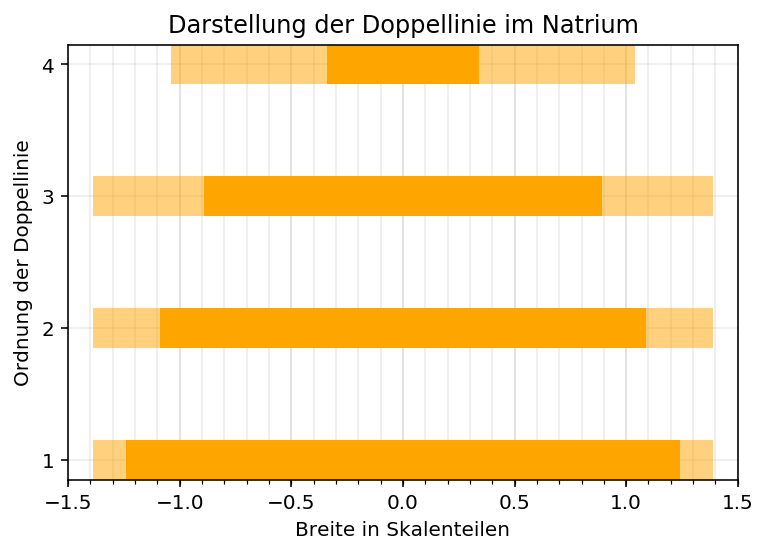

In [3]:
data=[]
data.append( pd.read_csv("Data/Na.txt",delimiter="\t",skiprows=3 ))

n,x,d1,d2,d3=[],[],[],[],[]
for entry in data:
    n= entry.values[:,0]
    x= entry.values[:,1]
    d1=entry.values[:,2]
    d2=entry.values[:,3]
    d3=entry.values[:,4]

deg=skala(x)
alphas=[.5,1,.5]
pos=[.94,.96,.98,1]
fig,ax = plt.subplots(dpi=144)
for i in range(4):
    a=pos[i]
    shift=(d3[i]+d2[i]+d1[i])/2
    # d1 d2 d3
    ax.plot( (-shift ,d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= .5)
    ax.plot( (d1[i]-shift ,d2[i]+d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= 1)
    ax.plot( (d2[i]+d1[i]-shift ,d3[i]+d2[i]+d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= .5)
ns=[int(z) for z in n]
ax.set(yticks=pos,yticklabels=ns, title="Darstellung der Doppellinie im Natrium",
      ylabel="Ordnung der Doppellinie", xlabel="Breite in Skalenteilen")
ax.set_xticks(np.arange(-1.5,1.6,.1),minor=True)
ax.grid(which="both",alpha=.25)
fig.savefig("Plots/Doppel_Na.png")

C_Na= calcC(n,deg)
dC_Na=calcdC(n,deg,dskala(x))
n_Na=n
deg_Na=deg
x_Na=x
wl_Na=[589.3e-9 for i in deg]

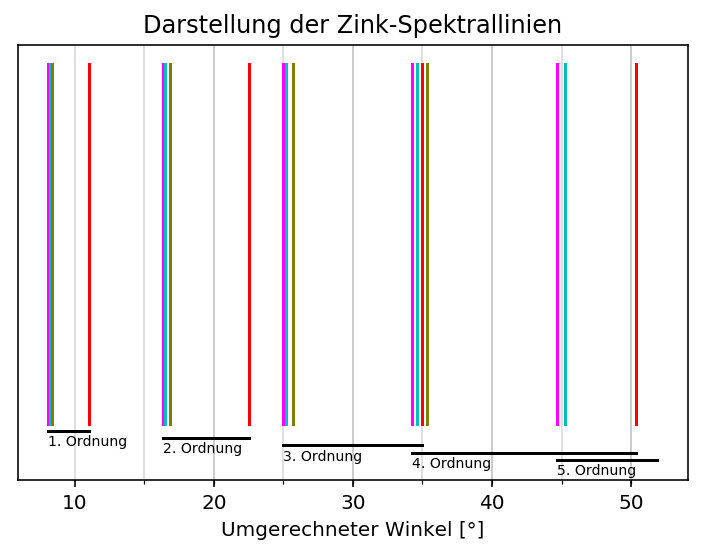

In [4]:
data=[]
data.append( pd.read_csv("Data/Zn.txt",delimiter="\t",skiprows=3 ))

n,x,d=[],[],[]
for entry in data:
    n= entry.values[:,0]
    x= entry.values[:,1]
    c= entry.values[:,2]
    
x=[i for i in x]
deg=np.array([skala(i) for i in x]) 
ddeg=np.array([dskala(i) for i in x]) 

dic = {"violett":"magenta", "blau":"c", "oliv":"olive", "rot":"r",
      "orange":"darkorange", "?":"darkolivegreen", "trkis":"turquoise"}

fig,ax=plt.subplots(dpi=144)
for i in range(len(n)):
    ax.plot( (deg[i],deg[i]), (1,1.5), color=dic[c[i]])
for i in range(5):
    a = deg[getColor(c,i,"violett")]
    if i==4:
        ax.plot( (a , deg[getColor(c,i-1,"rot")]+1.5 ) , (.99-i*.01,.99-i*.01), color="black" ) 
        ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7)
        continue
    ax.plot( (a , deg[getColor(c,i,"rot")] ) , (.99-i*.01,.99-i*.01), color="black" ) 
    ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7)
    
ax.set(yticks=[],xlabel="Umgerechneter Winkel [°]", title="Darstellung der Zink-Spektrallinien")
ax.set_xticks(np.arange(15,106/2,5),minor=True)
ax.grid(which="both",alpha=.5)
fig.savefig("Plots/Zink_Linien.png")

dicWavelens = {"violett":468e-9, "blau":472.2e-9, "oliv":481.1e-9, "rot":636.2e-9}
wavelens= [dicWavelens[i] for i in c]

C_Zn =calcC(n,deg)
dC_Zn=calcdC(n,deg,[dskala(i) for i in x],lambd=wavelens)
n_Zn=n
deg_Zn=deg
ddeg_Zn=ddeg
x_Zn=x
wl_Zn=wavelens
c_Zn=c

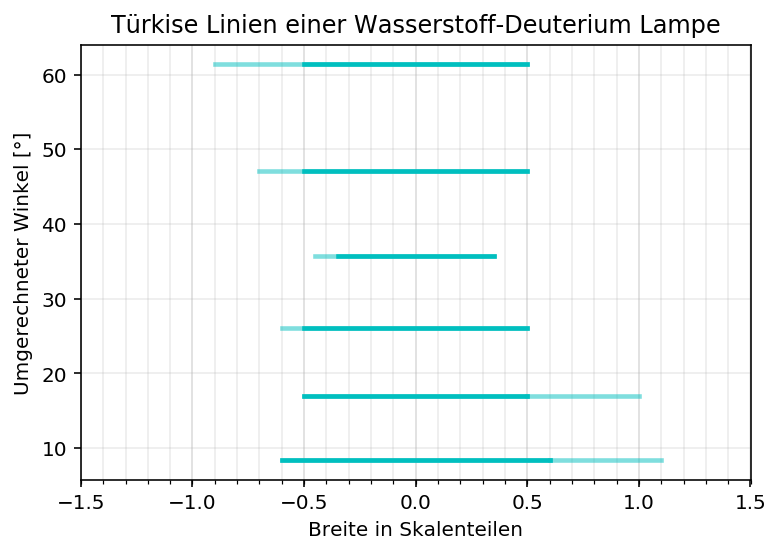

In [5]:
data=[]
data.append( pd.read_csv("Data/H-D.txt",delimiter="\t",skiprows=4 ))

x,d1,d2,d3=[],[],[],[]
for entry in data:
    x=  entry.values[:,0]
    d1= entry.values[:,1]
    d2= entry.values[:,2]
    d3= entry.values[:,3]
    
x=skala(x) # Umrechnung in Winkel
# Linienbreite soll Winkelfehler darstellen: dx= 2cm * Umrechnung
lw=skala(20)
# skala(20) stellt gute Grafik dar, jedoch ist dann der Fehler nicht mehr korrekt...

fig,ax = plt.subplots(dpi=144)
for i in range(len(x)):
    ax.plot( (-d2[i]/2-d1[i],d2[i]/2 )  ,(x[i],x[i]) , lw=lw,color="c", alpha= .5)
    ax.plot( (-d2[i]/2,d2[i]/2 )  ,(x[i],x[i]), lw=lw,color="c", alpha= 1)
    ax.plot( (d2[i]/2,d2[i]/2+d3[i])  ,(x[i],x[i]), lw=lw,color="c", alpha= .5)
ax.set(title="Türkise Linien einer Wasserstoff-Deuterium Lampe",
      ylabel="Umgerechneter Winkel [°]", xlabel="Breite in Skalenteilen")
ax.set_xticks(np.arange(-1.5,1.6,.1),minor=True)
ax.grid(which="both",alpha=.25)
fig.savefig("Plots/HD_türkise_Linien.png")

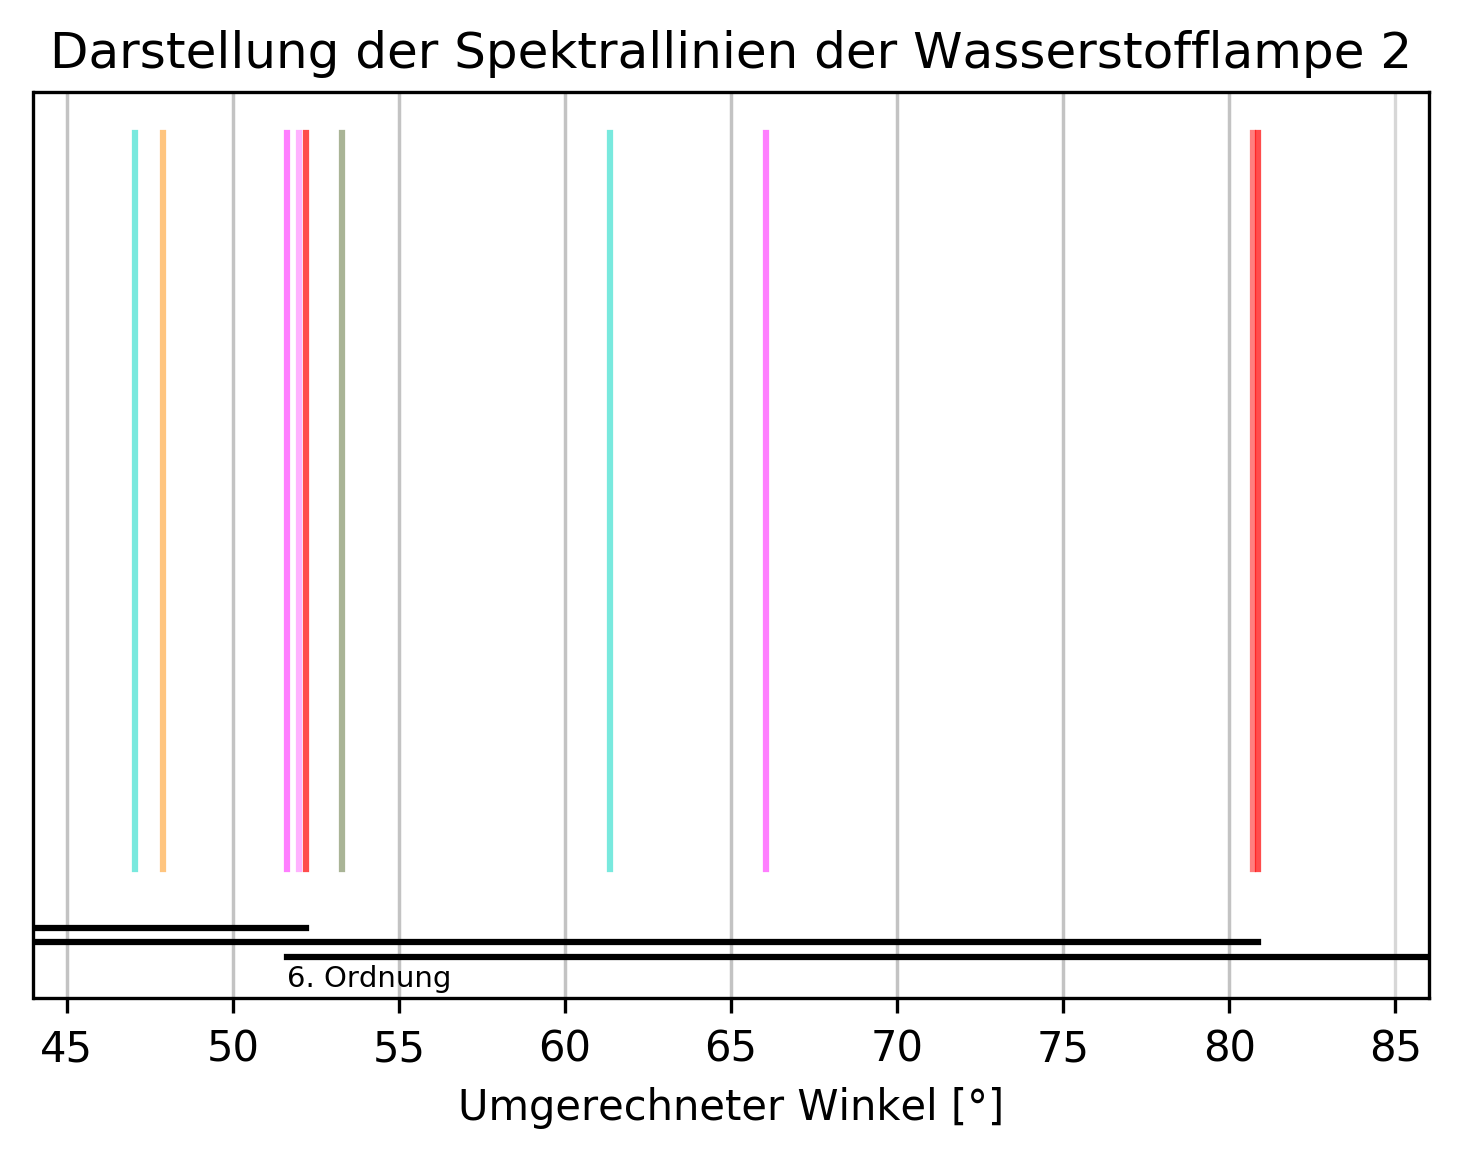

In [6]:
data=[]
data.append( pd.read_csv("Data/H.txt",delimiter="\t",skiprows=4 ))
zero=0
c,x,intens,n_H=[],[],[],[]
for entry in data:
    c= entry.values[1:,0]
    x= entry.values[1:,1]
    intens= entry.values[1:,2]
    n_H= entry.values[1:,3]
    
intens=[int(i) for i in intens]
deg=skala(x)
ddeg=[dskala(i) for i in x]

fig,ax=plt.subplots(dpi=300)
for i in range(len(c)):
    ax.plot( (deg[i],deg[i]), (1,1.5), color=dic[c[i]],alpha=intens[i]*.2+.1)
ordnungen=[]
for i in range(6):
    b=i
    if i>1:
        b+=1
    a = deg[getColor(c,b,"violett")]
    if i==4: 
        zero=1 # Zero regelt die letzte doppellinie rot: damit die 5.Ordnung bis zur zweiten geht
    ende=deg[getColor(c,i+zero,"rot")]
    zero=0
    if i==5:
        ende=162
    ax.plot( (a , ende ) , (.99-i*.01,.99-i*.01), color="black" ) 
    ordnungen.append(ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7))

ax.set_xticks(np.arange(15,166/2,5),minor=True)
ax.grid(which="both",alpha=.5)
for i in range(2):
    if i==1:
        for j in range(len(ordnungen)-1):
            ordnungen[j].set_visible(False)
    ax.set(yticks=[],xlabel="Umgerechneter Winkel [°]", xlim=[4+40*i,46+40*i],
           title="Darstellung der Spektrallinien der Wasserstofflampe {}".format(i+1))
    fig.savefig("Plots/HD_Linien_{}.png".format(i))

deg_H=deg
ddeg_H=ddeg
c_H=c

# Ordnugn 5: orange Linie nicht mehr gefunden

#Alter iwas geht da mit den ORdnungen hat in den A****
#Vll nochmal bei 90° druchschneiden?

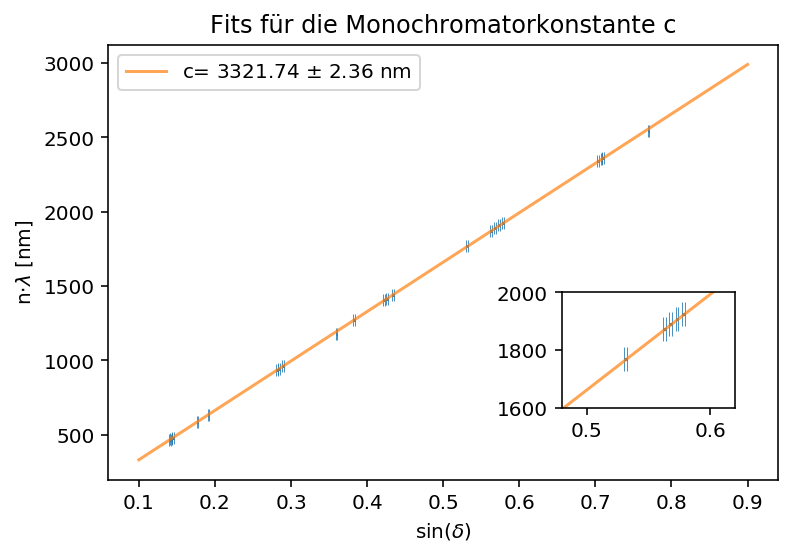

In [7]:
sins=np.sin(np.append(deg_Zn,deg_Na) * np.pi/180)
dsins= np.cos(np.append(deg_Zn,deg_Na) * np.pi/180) * np.array([dskala(i)*np.pi/180 for i in np.append(x_Zn,x_Na)])
nlambda= [np.append(n_Zn,n_Na)[i] * np.append(wl_Zn,wl_Na)[i] * 1e9 for i in range(len(sins))]

sins_tex=sins.round(4)
dsins_tex=dsins.round(4)

# Diese bekackten Punkte bei 1 werden vor dem Fit entfernt:
def getGoodFitData(sins,dsins,nlambda, grenze):
    sins_good=[]
    nlam_good=[]
    dsins_good=[]
    for i in range(len(sins)):
        if sins[i]> grenze :
            continue
        sins_good.append(sins[i])
        nlam_good.append(nlambda[i])
        dsins_good.append(dsins[i])
    return sins_good,nlam_good,dsins_good
    
def fitt(x,c):
    return x/c

fig,ax=plt.subplots(dpi=144)
ax.errorbar(sins, nlambda, fmt="none", xerr=dsins,capthick=.4,capsize=3,alpha=1)

# tex.get_table(["Ordnung n", "$\lambda$ [nm]","$sin(\delta)$","$\Delta sin(\delta)$"],
#             [np.append(n_Zn,n_Na),np.append(wl_Zn,wl_Na)*1e9,sins_tex,dsins_tex])

grenzen=.9
sins_good,nlam_good,dsins_good = getGoodFitData(sins,dsins,nlambda, grenzen )
popt,pcov=cf( fitt, nlam_good,sins_good,sigma=dsins_good,p0=[2000])
perr=np.sqrt(np.diag(pcov))

plotArray=np.linspace(.1,grenzen,1000)
ax.plot(plotArray, fitt(plotArray,1/popt), label="c= {:.2f} $\pm$ {:.2f} nm".format(*popt,*perr),alpha=.7)
ax.set(xlabel="sin($\delta$)", ylabel="n$\cdot \lambda$ [nm]", title="Fits für die Monochromatorkonstante c")
ax.legend()
testWindow = plt.axes([.65, .25, .2, .2])
testWindow.errorbar(sins, nlambda, fmt="none", xerr=dsins,capthick=.4,capsize=6,alpha=1)
testWindow.plot(plotArray, fitt(plotArray,1/popt),alpha=.7)
testWindow.set(ylim=[1600,2000],xlim=[.48,.62])

fig.savefig("Plots/Monochromatorkonstante.png")

gitterC,dgitterC= popt,perr

In [8]:
# Nachrechnen über Mittelung einzelner c Werte
sins=np.sin(np.append(deg_Zn,deg_Na) * np.pi/180)
def getGoodAt(sins,C,dC,grenze):
    C_good,dC_good=[],[]
    for i in range(len(sins)):
        if sins[i]> grenze :
            continue
        C_good.append(C[i])
        dC_good.append(dC[i])
    return C_good,dC_good

C= np.append(C_Zn,C_Na)
dC=np.append(dC_Zn,dC_Na)

grenzen=[1,.97,.85]
for i in range(len(grenzen)):
    C_good,dC_good=getGoodAt(sins, C,dC, grenzen[i])
    print(np.mean(C_good),np.mean(dC_good),grenzen[i])

3.79467871039e-06 1.02833683218e-08 1
3.79467871039e-06 1.02833683218e-08 0.97
3.79467871039e-06 1.02833683218e-08 0.85


In [9]:
# Jetzt H Wellenlängen bestimmen?
# grau bzw ? und orange gehören selbst nicht zum Wasserstoff spektrum

# Nach lambda = c sin(delta) /n
# daraus dann R_\infty: Rydberg Konstante

# Nur die Daten nehmen wo auch 2 Linien nebeneinander vorkommen? 

def get_wl(n,delta,ddelta,g,dg):
    wl,dwl=[],[]
    for i in range(len(n)):
        wl.append( float( g/n[i] *np.sin(delta[i] * np.pi/180))) # input delta in gradmaß
        dwl.append( float(np.sqrt((dg*np.sin(delta[i] * np.pi/180))**2  + 
                             (g* np.cos(delta[i] * np.pi/180) * ddelta[i])**2 ) /n[i]))
    return wl, dwl

dicSprung= {"rot":1/4-1/9 , "trkis":1/4-1/16 , "violett":1/4-1/25}
def getR_infty(wl,dwl,color):
    R_infty,dR_infty = [],[]
    for i in range(len(wl)):
        R_infty.append( 1 / wl[i]/ dicSprung[color[i]]) 
        dR_infty.append( 1/ wl[i]**2 *dwl[i] / dicSprung[color[i]])
    return R_infty,dR_infty

[ 433.57435622  485.82368202  655.99839607  436.30157246  485.59170959
  433.88091845  655.35230976  485.73266362  432.29371949  484.82873613
  655.34928938  432.69287806  486.26889131  436.32090633  656.1728052
  485.88704423  433.67719209  655.95009804]
H
V : 434.10593473
dV: 69.2002683411
B : 485.688787816
dB: 75.379636119
R : 655.76457969
dR: 80.1368341541
[ 433.57435622  485.82368202  655.99839607  432.94426657  485.59170959
  433.88091845  655.35230976  485.73266362  432.29371949  484.82873613
  655.34928938  432.69287806  486.26889131  434.05126361  656.1728052
  485.88704423  433.67719209  655.63477671]
D
V : 433.302084928
dV: 69.2410508124
B : 485.688787816
dB: 75.379636119
R : 655.701515425
dR: 80.175710288
[0.010982902225561343, 0.010977919625321943, 0.010975636591705041, 0.010998886299179413, 0.010914250744090285, 0.010983163896749748, 0.010975142163222739, 0.010986457044257828, 0.010979976708928814, 0.011015438224471694, 0.011000448067412889, 0.010986507678610924, 0.011005

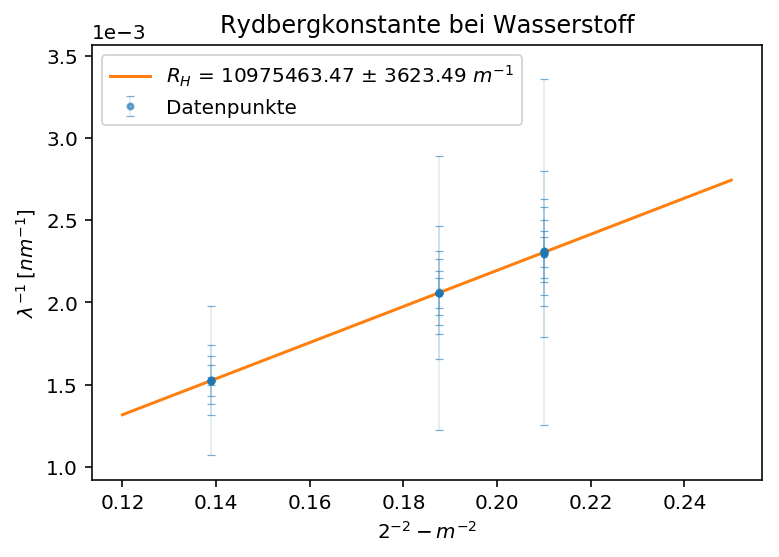

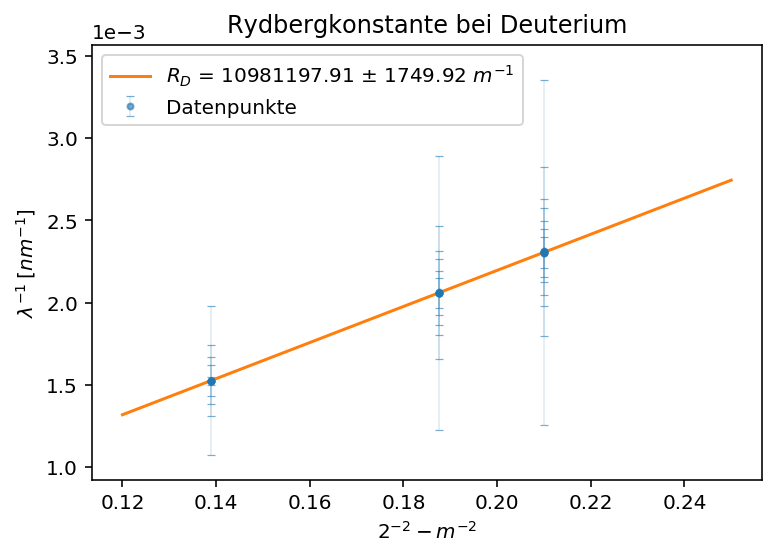

In [30]:
import scipy.constants as c
# ? und orange aus c_H heraus filtern
c_H_ryd,deg_H_ryd,ddeg_H_ryd, n_H_ryd= [],[],[],[]
for i in range(len(c_H)):
    if c_H[i]== "?" or c_H[i]== "orange":
        continue
    c_H_ryd.append(c_H[i])
    deg_H_ryd.append(deg_H[i])
    ddeg_H_ryd.append(ddeg_H[i])
    n_H_ryd.append(int(n_H[i]))

# Ordnugn der Maxima bestimmen, Problem: Doppellinien
# Wird in der textdatei per hand eingefügt....

g,dg = gitterC,dgitterC

wl_H_ryd,dwl_H_ryd = get_wl(n_H_ryd, deg_H_ryd, ddeg_H_ryd, g, dg)
#print(dwl_H_ryd)

gerade= lambda x,a: a*x
xdata = [ dicSprung[i] for i in c_H_ryd]
wl_H_ryd=np.array(wl_H_ryd)
dwl_H_ryd=np.array(dwl_H_ryd)

def plotMyRyd(xdata, wl_H_ryd,dwl_H_ryd, test=False): 
    # Deuteriumlinien haben die kleinere Wellenlänge, da mehr Energie bzgl schwereren Kern
    if(test==False):
        xdata = np.array(xdata[:3] + xdata[4:14] + xdata[15:19] + xdata[20:])
        wl_H_ryd= np.append ( np.append(wl_H_ryd[:3],wl_H_ryd[4:14]),np.append(wl_H_ryd[15:19],wl_H_ryd[20:]) )
        dwl_H_ryd= np.append ( np.append(dwl_H_ryd[:3],dwl_H_ryd[4:14]),np.append(dwl_H_ryd[15:19],dwl_H_ryd[20:]) )
        name="Rydbergkonstante bei Wasserstoff"
        tag="R_H"
        print(wl_H_ryd)
        
        print("H")
        print("V :", np.mean([wl_H_ryd[0], wl_H_ryd[3], wl_H_ryd[5], wl_H_ryd[8], wl_H_ryd[11], wl_H_ryd[13], wl_H_ryd[16]]))
        print("dV:",np.mean([dwl_H_ryd[0],dwl_H_ryd[3],dwl_H_ryd[5],dwl_H_ryd[8],dwl_H_ryd[11],dwl_H_ryd[13],dwl_H_ryd[16]]))
        print("B :", np.mean([wl_H_ryd[1], wl_H_ryd[4], wl_H_ryd[7], wl_H_ryd[9], wl_H_ryd[12], wl_H_ryd[15]]))
        print("dB:",np.mean([dwl_H_ryd[1],dwl_H_ryd[4],dwl_H_ryd[7],dwl_H_ryd[9],dwl_H_ryd[12],dwl_H_ryd[15]]))
        print("R :", np.mean([wl_H_ryd[2], wl_H_ryd[6], wl_H_ryd[10], wl_H_ryd[14], wl_H_ryd[17]]))
        print("dR:",np.mean([dwl_H_ryd[2],dwl_H_ryd[6],dwl_H_ryd[10],dwl_H_ryd[14],dwl_H_ryd[17]]))  
        
    if(test==True): 
        xdata = np.array(xdata[:4]+ xdata[5:15]+ xdata[16:-1] )
        wl_H_ryd= np.append ( np.append(wl_H_ryd[:4],wl_H_ryd[5:15]),wl_H_ryd[16:-1])
        dwl_H_ryd= np.append ( np.append(dwl_H_ryd[:4],dwl_H_ryd[5:15]),dwl_H_ryd[16:-1]) 
        name="Rydbergkonstante bei Deuterium"
        tag="R_D"
        print(wl_H_ryd)
        
        print("D")
        print("V :", np.mean([wl_H_ryd[0], wl_H_ryd[3], wl_H_ryd[5], wl_H_ryd[8], wl_H_ryd[11], wl_H_ryd[13], wl_H_ryd[16]]))
        print("dV:",np.mean([dwl_H_ryd[0],dwl_H_ryd[3],dwl_H_ryd[5],dwl_H_ryd[8],dwl_H_ryd[11],dwl_H_ryd[13],dwl_H_ryd[16]]))
        print("B :", np.mean([wl_H_ryd[1], wl_H_ryd[4], wl_H_ryd[7], wl_H_ryd[9], wl_H_ryd[12], wl_H_ryd[15]]))
        print("dB:",np.mean([dwl_H_ryd[1],dwl_H_ryd[4],dwl_H_ryd[7],dwl_H_ryd[9],dwl_H_ryd[12],dwl_H_ryd[15]]))
        print("R :", np.mean([wl_H_ryd[2], wl_H_ryd[6], wl_H_ryd[10], wl_H_ryd[14], wl_H_ryd[17]]))
        print("dR:",np.mean([dwl_H_ryd[2],dwl_H_ryd[6],dwl_H_ryd[10],dwl_H_ryd[14],dwl_H_ryd[17]]))
    
    popt,pcov=cf ( gerade, xdata , 1/wl_H_ryd, sigma = dwl_H_ryd/wl_H_ryd**2, p0=1e9)
    perr=np.sqrt(np.diag(pcov))
    labelInput=[popt[0]*1e9,1e9*perr[0]]

    xplot=np.linspace(.12,.25,1000)
    yplot= gerade(xplot,popt)
    
    fig,ax=plt.subplots(dpi=144)
    ax.errorbar(xdata,1/wl_H_ryd, fmt=".", yerr=1/wl_H_ryd**2 *dwl_H_ryd, capthick=.6,capsize=2 ,alpha=.6,lw=.2,
               label= "Datenpunkte")
    ax.plot(xplot, yplot,label=r"${}$ = {:.2f} $\pm$ {:.2f} {}".format(tag,*labelInput,r"$m^{-1}$"))
    ax.set(xlabel=r"$2^{-2} - m^{-2}$", ylabel=r"$\lambda^{-1} \: [nm^{-1}]$" , ylim=(yplot[0]*.7, yplot[-1]*1.3),
          title= name)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.legend()
    
    fig.savefig("Plots/{}.png".format(tag))
    
plotMyRyd(xdata,wl_H_ryd,dwl_H_ryd)
plotMyRyd(xdata,wl_H_ryd,dwl_H_ryd,test=True)

R,dR = getR_infty(wl_H_ryd,dwl_H_ryd, c_H_ryd)
print(R)
print(np.mean(R)*1e9,np.mean(dR)*1e9)
print(c.value("Rydberg constant") )

# Extra Plot für die Deuterium Linien? -> sind halt nur 3 messwerte
# Diese 3 Werte wurden auch beim H plot hgeraus genommen.
# Alle einfach vorkommenden Linien bei beiden Fits

In [11]:
head=["Ordnung","Farbe", "$\delta$","$\Delta\delta$", "$\lambda$ [nm]","$\Delta\lambda$ [nm]" ]
deg_H=[round(i,2) for i in deg_H]
ddeg_H=np.array(ddeg_H).round(2)
n_H=np.array([int(i) for i in n_H])
a,b=get_wl(n_H, deg_H, ddeg_H, g, dg)
a,b=np.array(a).round(2),np.array(b).round(2)
# tex.get_table(head,[n_H,c_H,deg_H,ddeg_H,a,b])

In [12]:
head=["Ordnung","Farbe", "$\delta$","$\Delta\delta$" ]
deg_Zn=deg_Zn.round(2)
ddeg_Zn=ddeg_Zn.round(2)
tex.get_table(head,[n_Zn,c_Zn,deg_Zn,ddeg_Zn])

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Ordnung & Farbe & $\delta$ & $\Delta\delta$ \\ \hline\hline
1 & violett & 8.09 & 0.06 \\ \hline
1 & blau & 8.19 & 0.06 \\ \hline
1 & oliv & 8.32 & 0.06 \\ \hline
1 & rot & 11.05 & 0.06 \\ \hline
2 & violett & 16.34 & 0.06 \\ \hline
2 & blau & 16.52 & 0.06 \\ \hline
2 & oliv & 16.83 & 0.06 \\ \hline
2 & rot & 22.49 & 0.06 \\ \hline
3 & violett & 24.96 & 0.06 \\ \hline
3 & blau & 25.22 & 0.06 \\ \hline
3 & oliv & 25.72 & 0.06 \\ \hline
3 & rot & 34.97 & 0.07 \\ \hline
4 & violett & 34.26 & 0.07 \\ \hline
4 & blau & 34.61 & 0.07 \\ \hline
4 & oliv & 35.34 & 0.07 \\ \hline
4 & rot & 50.37 & 0.08 \\ \hline
5 & violett & 44.7 & 0.07 \\ \hline
5 & blau & 45.25 & 0.07 \\ \hline
\hline
\end{tabular}
\caption{\label{}}
\end{table}
